# **Extract Bag of Words (BoW) Features from Course Textual Content**

The main goal of recommender systems is to help users find items they potentially interested in. Depending on the recommendation tasks, an item can be a movie, a restaurant, or, in our case, an online course.

Machine learning algorithms cannot work on an item directly so we first need to extract features and represent the items mathematically, i.e., with a feature vector.

Many items are often described by text so they are associated with textual data, such as the titles and descriptions of a movie or course. Since machine learning algorithms can not process textual data directly, we need to transform the raw text into numeric feature vectors.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_2/images/extract_textual_features.png)

Extract the bag of words (BoW) features from course titles and descriptions. The BoW feature is a simple but effective feature characterizing textual data and is widely used in many textual machine learning tasks.

Objective:

* Extract Bag of Words (BoW) features from course titles and descriptions
* Build a course BoW dataset to be used for building a content-based recommender system later


In [1]:
!pip install nltk==3.6.7
!pip install gensim
!pip install scipy==1.10
!pip install pandas
!pip install nltk
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [3]:
import gensim
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

%matplotlib inline

In [4]:
# Download stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
# also set a random state
rs = 123

### Bag of Words (BoW) features

BoW features are essentially the counts or frequencies of each word that appears in a text (string). Let's illustrate it with some simple examples.


In [6]:
# Suppose we have two course descriptions as follows:

course1 = "this is an introduction data science course which introduces data science to beginners"

In [7]:
course2 = "machine learning for beginners"

In [8]:
courses = [course1, course2]
courses

['this is an introduction data science course which introduces data science to beginners',
 'machine learning for beginners']

The first step is to split the two strings into words (tokens). A token in the text processing context means the smallest unit of text such as a word, a symbol/punctuation, or a phrase, etc. The process to transform a string into a collection of tokens is called `tokenization`.


 More specifically, we will use the ```word_tokenize()``` method on the content of course (string):


In [9]:
# Tokenize the two courses
tokenized_courses = [word_tokenize(course) for course in courses]

In [10]:
tokenized_courses

[['this',
  'is',
  'an',
  'introduction',
  'data',
  'science',
  'course',
  'which',
  'introduces',
  'data',
  'science',
  'to',
  'beginners'],
 ['machine', 'learning', 'for', 'beginners']]

As you can see from the cell output, two courses have been tokenized and turned into two token arrays.


Next, we want to create a token dictionary to index all tokens. Basically, we want to assign a key/index for each token. One way to index tokens is to use the `gensim` package which is another popular package for processing textual data:


In [11]:
# Create a token dictionary for the two courses
tokens_dict = gensim.corpora.Dictionary(tokenized_courses)

In [12]:
print(tokens_dict.token2id)

{'an': 0, 'beginners': 1, 'course': 2, 'data': 3, 'introduces': 4, 'introduction': 5, 'is': 6, 'science': 7, 'this': 8, 'to': 9, 'which': 10, 'for': 11, 'learning': 12, 'machine': 13}


With the token dictionary, we can easily count each token in the two example courses and output two BoW feature vectors. However, more conveniently, the `gensim` package provides us a `doc2bow` method to generate BoW features out-of-box.


In [13]:
# Generate BoW features for each course
courses_bow = [tokens_dict.doc2bow(course) for course in tokenized_courses]

In [14]:
courses_bow

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(1, 1), (11, 1), (12, 1), (13, 1)]]

It outputs two BoW arrays where each element is a tuple, e.g., (0, 1) and (7, 2). The first element of the tuple is the token ID and the second element is its count. So `(0, 1)` means `(``an``, 1)` and `(7, 2)` means `(``science``, 2)`.

We can use the following code snippet to print each token and its count:


In [15]:
# Enumerate through each course and its bag-of-words representation
for course_idx, course_bow in enumerate(courses_bow):
    # Print the index of the current course and a label
    print(f"Bag of words for course {course_idx}:")
    # For each token index, print its bow value (word count)
    for token_index, token_bow in course_bow:
        # Retrieve the token from the tokens dictionary based on its index
        token = tokens_dict.get(token_index)
        # Print the token and its bag-of-words value
        print(f"--Token: '{token}', Count:{token_bow}")

Bag of words for course 0:
--Token: 'an', Count:1
--Token: 'beginners', Count:1
--Token: 'course', Count:1
--Token: 'data', Count:2
--Token: 'introduces', Count:1
--Token: 'introduction', Count:1
--Token: 'is', Count:1
--Token: 'science', Count:2
--Token: 'this', Count:1
--Token: 'to', Count:1
--Token: 'which', Count:1
Bag of words for course 1:
--Token: 'beginners', Count:1
--Token: 'for', Count:1
--Token: 'learning', Count:1
--Token: 'machine', Count:1


If we turn to the long list into a horizontal feature vectors, we can see the two courses become two numerical feature vectors:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_2/images/bow.png)

## BoW dimensionality reduction


A document may contain tens of thousands of words which makes the dimension of the BoW feature vector huge. To reduce the dimensionality, one common way is to filter the relatively meaningless tokens such as stop words or sometimes add position and adjective words.


We can use the english stop words provided in `nltk`:


In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Then we can filter those English stop words from the tokens in course1:


In [18]:
# Tokens in course 1
tokenized_courses[0]

['this',
 'is',
 'an',
 'introduction',
 'data',
 'science',
 'course',
 'which',
 'introduces',
 'data',
 'science',
 'to',
 'beginners']

In [19]:
processed_tokens = [w for w in tokenized_courses[0] if not w.lower() in stop_words]

In [20]:
processed_tokens

['introduction',
 'data',
 'science',
 'course',
 'introduces',
 'data',
 'science',
 'beginners']

You can see the number of tokens for ```course1``` has been reduced.


Another common way is to only keep nouns in the text. We can use the `nltk.pos_tag()` method to analyze the part of speech (POS) and annotate each word.


In [21]:
tags = nltk.pos_tag(tokenized_courses[0])
tags

[('this', 'DT'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('introduction', 'NN'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('course', 'NN'),
 ('which', 'WDT'),
 ('introduces', 'VBZ'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('to', 'TO'),
 ('beginners', 'NNS')]

As we can see [`introduction`, `data`, `science`, `course`, `beginners`] are all of the nouns and we may keep them in the BoW feature vector.


### TASK: Extract BoW features for course textual content and build a dataset


By now we have learned what a BoW feature is, so let's start extracting BoW features from some real course textual content.


In [22]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_content_df = pd.read_csv(course_url)

In [23]:
course_content_df.iloc[0, :]

,0
COURSE_ID,ML0201EN
TITLE,robots are coming build iot apps with watson ...
DESCRIPTION,have fun with iot and learn along the way if ...


The course content dataset has three columns `COURSE_ID`, `TITLE`, and `DESCRIPTION`. `TITLE` and `DESCRIPTION` are all text upon which we want to extract BoW features.


In [24]:
# Let's join those two text columns together.
# Merge TITLE and DESCRIPTION title
course_content_df['course_texts'] = course_content_df[['TITLE', 'DESCRIPTION']].agg(' '.join, axis=1)
course_content_df = course_content_df.reset_index()
course_content_df['index'] = course_content_df.index


In [25]:
course_content_df.iloc[0, :]

,0
index,0
COURSE_ID,ML0201EN
TITLE,robots are coming build iot apps with watson ...
DESCRIPTION,have fun with iot and learn along the way if ...
course_texts,robots are coming build iot apps with watson ...


In [26]:
# We have used the `tokenize_course()` method  to tokenize the course content:

def tokenize_course(course, keep_only_nouns=True):
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    # Tokenize the course text
    word_tokens = word_tokenize(course)
    # Remove English stop words and numbers
    word_tokens = [w for w in word_tokens if (not w.lower() in stop_words) and (not w.isnumeric())]
    # Only keep nouns
    if keep_only_nouns:
        # Define a filter list of non-noun POS tags
        filter_list = ['WDT', 'WP', 'WRB', 'FW', 'IN', 'JJR', 'JJS', 'MD', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS',
                       'RP']
        # Tag the word tokens with POS tags
        tags = nltk.pos_tag(word_tokens)
        # Filter out non-nouns based on POS tags
        word_tokens = [word for word, pos in tags if pos not in filter_list]

    return word_tokens

In [27]:
# Let's try it on the first course.

a_course = course_content_df.iloc[0, :]['course_texts']
a_course

'robots are coming  build iot apps with watson  swift  and node red have fun with iot and learn along the way  if you re a swift developer and want to learn more about iot and watson ai services in the cloud  raspberry pi   and node red  you ve found the right place  you ll build iot apps to read temperature data  take pictures with a raspcam  use ai to recognize the objects in those pictures  and program an irobot create 2 robot  '

In [28]:
tokenize_course(a_course)

['robots',
 'coming',
 'build',
 'iot',
 'apps',
 'watson',
 'swift',
 'red',
 'fun',
 'iot',
 'learn',
 'way',
 'swift',
 'developer',
 'want',
 'learn',
 'iot',
 'watson',
 'ai',
 'services',
 'cloud',
 'raspberry',
 'pi',
 'node',
 'red',
 'found',
 'place',
 'build',
 'iot',
 'apps',
 'read',
 'temperature',
 'data',
 'take',
 'pictures',
 'raspcam',
 'use',
 'ai',
 'recognize',
 'objects',
 'pictures',
 'program',
 'irobot',
 'create',
 'robot']

Next, we will need to write some code snippets to generate the BoW features for each course. Let's start by tokenzing all courses in the `courses_df`:


In [29]:
# Use provided tokenize_course() method to tokenize all courses in courses_df['course_texts'].
# Use tokenize_course(text, True) command to tokenize each text in courses_df['course_texts']

tokenized_courses = [tokenize_course(text, True) for text in course_content_df['course_texts']]


In [31]:
# need to create a token dictionary tokens_dict
# Use gensim.corpora.Dictionary(tokenized_courses) to create a token dictionary.

tokens_dict = gensim.corpora.Dictionary(tokenized_courses)

In [32]:
# use doc2bow() method to generate BoW features for each tokenized course.
# Use tokens_dict.doc2bow() to generate BoW features for each tokenized course.

courses_bow = [tokens_dict.doc2bow(course) for course in tokenized_courses]

Lastly, we need to append the BoW features for each course into a new BoW dataframe. The new dataframe needs to include the following columns (you may include other relevant columns as well):
- 'doc_index': the course index starting from 0
- 'doc_id': the actual course id such as `ML0201EN`
- 'token': the tokens for each course
- 'bow': the bow value for each token

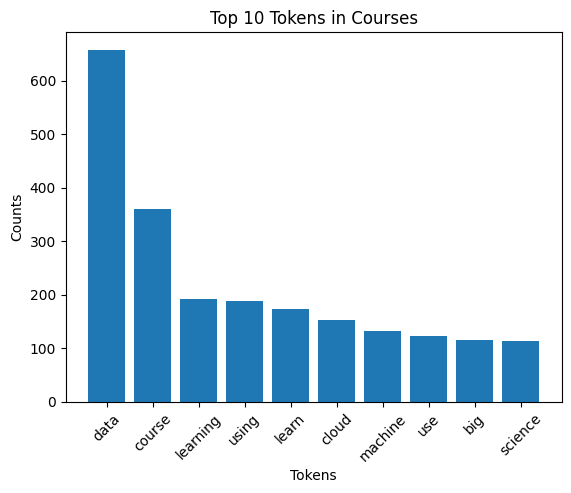

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of tokenized words
all_tokens = [token for course in tokenized_courses for token in course]

# Get the most common tokens
token_counts = Counter(all_tokens).most_common(10)

# Separate tokens and their counts
tokens, counts = zip(*token_counts)

# Plot the tokens
plt.bar(tokens, counts)
plt.xlabel('Tokens')
plt.ylabel('Counts')
plt.title('Top 10 Tokens in Courses')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a new course_bow dataframe based on the extracted BoW features.

#  ...
#  bow_dicts = {"doc_index": doc_indices,
#            "doc_id": doc_ids,
#            "token": tokens,
#            "bow": bow_values}
#  pd.DataFrame(bow_dicts)

# You can use 2 for-loops to create your data frame: first one will be `for doc_index, doc_bow in enumerate(bow_docs):` where bow_docs is the list of BoW features for each tokenized course and within this for-loop you will have another loop `for token_index, token_bow in doc_bow:`. Then you can get each "token" by applying the `token_index` to your `token_dict`,  `token_bow` will give you "bow" values, `doc_indices` will give you values for  "doc_index" and you can get "doc_id" by using `courses_df['COURSE_ID']` list and `doc_index` as indexes.





In [34]:
# Assuming tokens_dict, courses_bow, and course_content_df (with 'COURSE_ID') are already defined

# Initialize lists to hold the values for each column
doc_indices = []
doc_ids = []
tokens = []
bow_values = []

# Iterate through each document's BoW
for doc_index, doc_bow in enumerate(courses_bow):
    # Get the corresponding course ID from the course_content_df using the doc_index
    doc_id = course_content_df.loc[doc_index, 'COURSE_ID']

    # For each token and its bow value in the current document
    for token_index, token_bow in doc_bow:
        # Retrieve the token (word) from the token dictionary using its index
        token = tokens_dict.get(token_index)

        # Append the data to the respective lists
        doc_indices.append(doc_index)
        doc_ids.append(doc_id)
        tokens.append(token)
        bow_values.append(token_bow)

# Create a dictionary to hold the data
bow_dicts = {
    "doc_index": doc_indices,
    "doc_id": doc_ids,
    "token": tokens,
    "bow": bow_values
}

# Create the course_bow DataFrame from the bow_dicts
course_bow_df = pd.DataFrame(bow_dicts)

# Display the first few rows of the DataFrame
course_bow_df.head()


,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1
